In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import Counter
import re

from datasets import load_dataset
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
 

import warnings
warnings.filterwarnings("ignore")


nltk.download('stopwords')
print(stopwords.words('arabic'))
nltk.download('punkt')


['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Moamen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Moamen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
dataset = load_dataset('J-Mourad/MNAD.v2')

In [3]:
df = pd.DataFrame(dataset['train'])
df.head()

,Title,Body,Category,Source
0,البرلمانيون يريدون توريث تقاعدهم لأبنائهم ، وه...,أخبارنا المغربية : سناء الوردي لازالت الحكومة ...,Business,Akhbarona.ma
1,افتتاح معرض الشرق الأوسط للطيران الخاص (ميبا 2...,أخبارنا المغربية انطلقت اليوم الاثنين بدبي، فع...,Business,Akhbarona.ma
2,فاعلون ومنعشون سياحيون بتنغير يستبشرون خيرا با...,الحسن فاتحي استبشر مجموعة من الفاعلون السياحيو...,Business,Akhbarona.ma
3,اتفاقات ثنائية بـ150 مليون يورو بين المغرب وال...,الرباط ـــ وكالات وقع المغرب البلد الوحيد الذي...,Business,Akhbarona.ma
4,أسعار المحروقات ستعرف انخفاضا طفيفا ابتداءا من...,أخبارنا المغربية كما سيعرف سعر البنزين انخفاضا...,Business,Akhbarona.ma


In [4]:
df.shape

(1069489, 4)

In [5]:
# Check the number of unique categories
unique_categories = df['Category'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 20


In [6]:
df['Category'].value_counts()

Category
Society          310677
Sport            217914
Policy           153806
International     89122
Events            59318
Business          55465
Culture           49423
World             27526
Regions           22860
Influencers       18490
Immigrants        14899
National          13542
Environment       12766
Tech               7561
Health             7190
Women              5153
Education          1430
Tamazight          1079
Religion            844
Cars                424
Name: count, dtype: int64

In [7]:
unique_sources = df['Source'].nunique()
print("Number of Unique Sources:", unique_sources)

Number of Unique Sources: 11


In [8]:
df['Source'].value_counts()

Source
Alyaoum24.com     156633
Hespress.ma       151798
Le360.com         144695
Barlamane.com     127127
Alayam24.com      105455
Al3omk.com        101161
Anfaspress.com     96385
Hibapress.com      64722
Akhbarona.ma       57348
Medi1News.com      48563
SnrtNews.com       15602
Name: count, dtype: int64

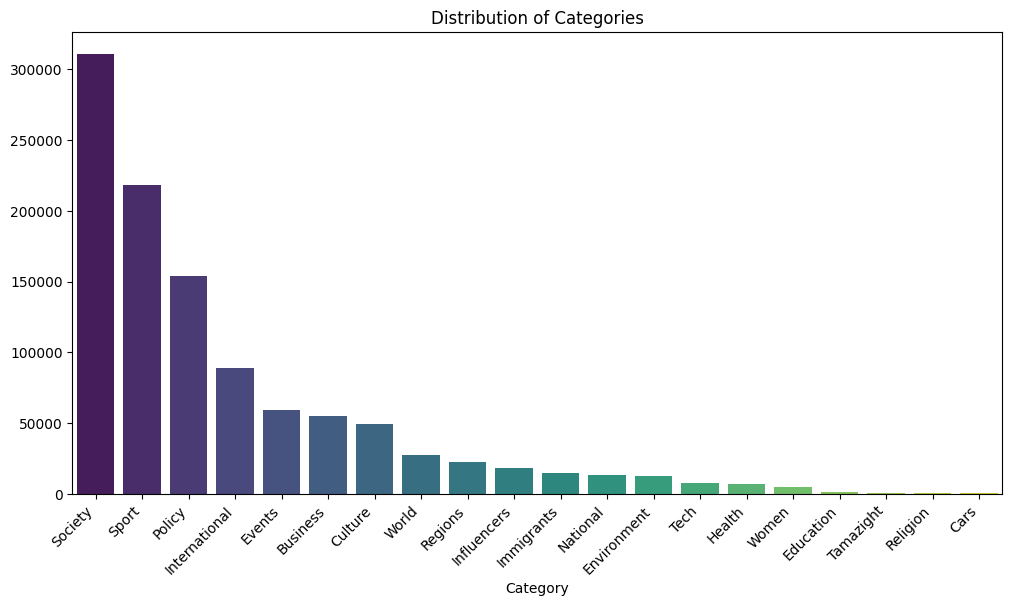

In [9]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')
plt.show()

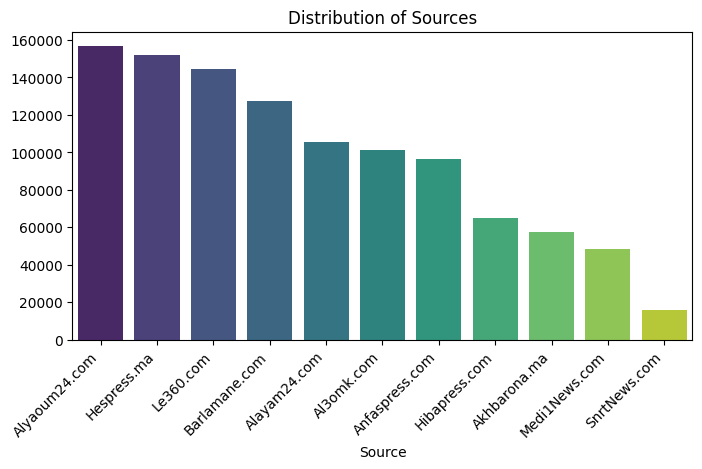

In [10]:
source_counts = df['Source'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=source_counts.index, y=source_counts.values, palette="viridis")
plt.title('Distribution of Sources')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

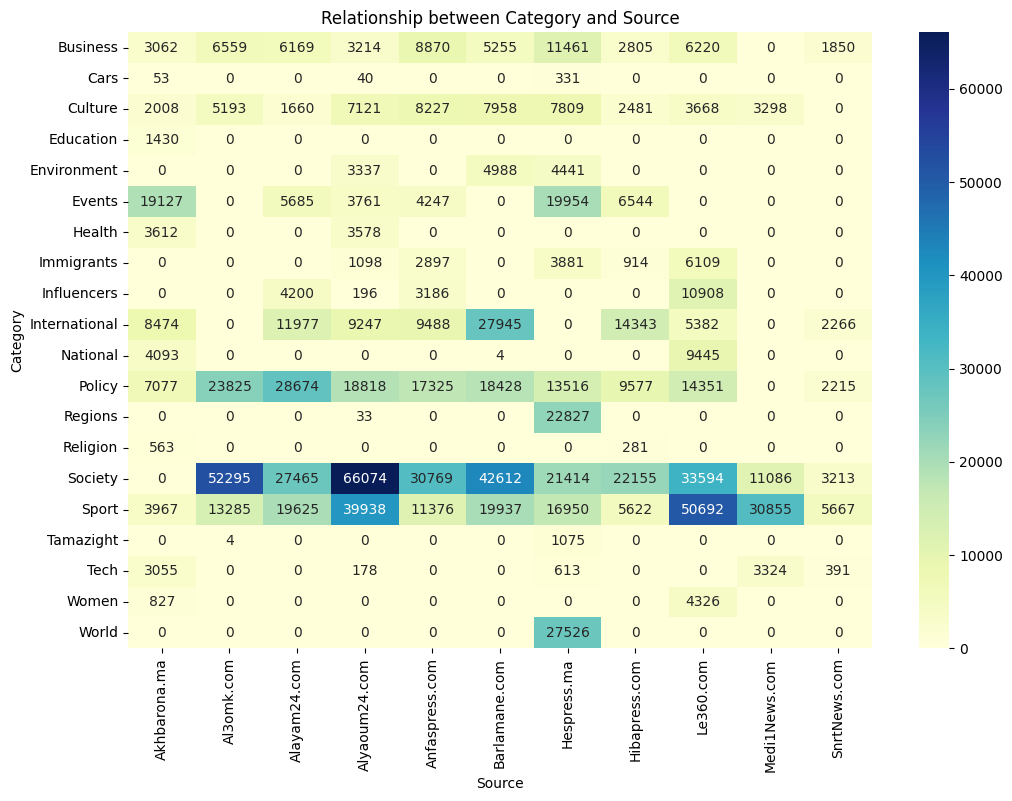

In [11]:
cross_tab = pd.crosstab(df['Category'], df['Source'])
plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, cmap="YlGnBu", annot=True, fmt="d", cbar=True)
plt.title('Relationship between Category and Source')
plt.show()

## Data Sampling

In [12]:
df_s = df.sample(100000)

## Tokenization

In [13]:
def tokenize_arabic(text):
    return nltk.word_tokenize(text)

In [14]:
df_s['titletokens'] = df_s['Title'].apply(tokenize_arabic)
df_s['bodytokens'] = df_s['Body'].apply(tokenize_arabic)

In [15]:
df_s.head(5)

,Title,Body,Category,Source,titletokens,bodytokens
555935,مناورات انفصاليي البوليساريو في كواليس مناقشات...,كشفت المنظمة غير الحكومية “تقرير مجلس الأمن” (...,Policy,Barlamane.com,"[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,..."
766353,ندوة دولية بمراكش تسلط الضوء على ملف الهجرة,قال حسن أوريد إن “موضوع الهجرة أضحى متشعبا ويس...,Regions,Hespress.ma,"[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ..."
691276,مستخدمون يضربون عن العمل بمخازن للحبوب,سطّرت النقابة الوطنية لمستخدمي مخازن الحبوب با...,Regions,Hespress.ma,"[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح..."
1036343,الإقبال على المساجد في رمضان : توق للسكينة وال...,مع حلول شهر رمضان المبارك يتزايد الإقبال على ا...,Society,Medi1News.com,"[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا..."
30766,النساء مولعات أكثر من الرجال بالتقاط الصور على...,توصلت دراسة حديثة الى أن النساء مولعات في التق...,Tech,Akhbarona.ma,"[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,..."


## Remove Affixes

In [16]:
def process_arabic_token_list(tokens_list):
    processed_tokens = []
    for token in tokens_list:
        plus_positions = [i for i, char in enumerate(token) if char == '+']

        if not plus_positions:
            processed_tokens.append(token)

        elif len(plus_positions) == 1:
            processed_tokens.append(max(token.split('+'), key=len))

        elif len(plus_positions) == 2:
            parts = token.split('+')

            processed_token = parts[plus_positions[0] + 1:plus_positions[1]]

            processed_token = ''.join(processed_token)
            processed_tokens.append(processed_token)

    return processed_tokens

In [17]:
df_s['supptitleaffixes'] = df_s['titletokens'].apply(process_arabic_token_list)
df_s['suppbodyaffixes'] = df_s['bodytokens'].apply(process_arabic_token_list)

In [18]:
df_s.head(5)

,Title,Body,Category,Source,titletokens,bodytokens,supptitleaffixes,suppbodyaffixes
555935,مناورات انفصاليي البوليساريو في كواليس مناقشات...,كشفت المنظمة غير الحكومية “تقرير مجلس الأمن” (...,Policy,Barlamane.com,"[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,...","[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,..."
766353,ندوة دولية بمراكش تسلط الضوء على ملف الهجرة,قال حسن أوريد إن “موضوع الهجرة أضحى متشعبا ويس...,Regions,Hespress.ma,"[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ...","[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ..."
691276,مستخدمون يضربون عن العمل بمخازن للحبوب,سطّرت النقابة الوطنية لمستخدمي مخازن الحبوب با...,Regions,Hespress.ma,"[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح..."
1036343,الإقبال على المساجد في رمضان : توق للسكينة وال...,مع حلول شهر رمضان المبارك يتزايد الإقبال على ا...,Society,Medi1News.com,"[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا..."
30766,النساء مولعات أكثر من الرجال بالتقاط الصور على...,توصلت دراسة حديثة الى أن النساء مولعات في التق...,Tech,Akhbarona.ma,"[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,..."


## Remove Ponctuation

In [19]:
def remove_arabic_punctuation_from_list(tokens_list):
    arabic_punctuation_pattern = r'[%():/.؀-؃؆-؏؛؞؟،\'\'``”“""]'
    tokens_without_punct = [re.sub(arabic_punctuation_pattern, '', token) for token in tokens_list]
    return [token for token in tokens_without_punct if token]  # Supprimer les chaînes vides

In [20]:
df_s['noponcttitle'] = df_s['supptitleaffixes'].apply(remove_arabic_punctuation_from_list)
df_s['noponctbody'] = df_s['suppbodyaffixes'].apply(remove_arabic_punctuation_from_list)

## Remove Stopwords

In [21]:
def remove_arabic_stopwords(tokens_list):
    stop_words = set(stopwords.words('arabic'))
    return [token for token in tokens_list if token not in stop_words]

In [22]:
df_s['nostopwordstitle'] = df_s['noponcttitle'].apply(remove_arabic_stopwords)
df_s['nostopwordsbody'] = df_s['noponctbody'].apply(remove_arabic_stopwords)

In [23]:
df_s.head()

,Title,Body,Category,Source,titletokens,bodytokens,supptitleaffixes,suppbodyaffixes,noponcttitle,noponctbody,nostopwordstitle,nostopwordsbody
555935,مناورات انفصاليي البوليساريو في كواليس مناقشات...,كشفت المنظمة غير الحكومية “تقرير مجلس الأمن” (...,Policy,Barlamane.com,"[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,...","[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,...","[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, تقرير, مجلس, ال...","[مناورات, انفصاليي, البوليساريو, كواليس, مناقش...","[كشفت, المنظمة, الحكومية, تقرير, مجلس, الأمن, ..."
766353,ندوة دولية بمراكش تسلط الضوء على ملف الهجرة,قال حسن أوريد إن “موضوع الهجرة أضحى متشعبا ويس...,Regions,Hespress.ma,"[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ...","[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ...","[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, موضوع, الهجرة, أضحى, متش...","[ندوة, دولية, بمراكش, تسلط, الضوء, ملف, الهجرة]","[قال, حسن, أوريد, موضوع, الهجرة, متشعبا, ويسائ..."
691276,مستخدمون يضربون عن العمل بمخازن للحبوب,سطّرت النقابة الوطنية لمستخدمي مخازن الحبوب با...,Regions,Hespress.ma,"[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح..."
1036343,الإقبال على المساجد في رمضان : توق للسكينة وال...,مع حلول شهر رمضان المبارك يتزايد الإقبال على ا...,Society,Medi1News.com,"[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, على, المساجد, في, رمضان, توق, للسكين...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, المساجد, رمضان, توق, للسكينة, والأجو...","[حلول, شهر, رمضان, المبارك, يتزايد, الإقبال, ا..."
30766,النساء مولعات أكثر من الرجال بالتقاط الصور على...,توصلت دراسة حديثة الى أن النساء مولعات في التق...,Tech,Akhbarona.ma,"[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, الرجال, بالتقاط, الصور, الهوا...","[توصلت, دراسة, حديثة, الى, النساء, مولعات, الت..."


## Stemming

In [24]:
def farasa_stem_arabic(text):
    st = ISRIStemmer()
    stemmed_text = [st.stem(word) for word in text]
    return stemmed_text

In [25]:
df_s['stemmed_title'] = df_s['nostopwordstitle'].apply(farasa_stem_arabic)
df_s['stemmed_body'] = df_s['nostopwordsbody'].apply(farasa_stem_arabic)

In [26]:
df_s.head()

,Title,Body,Category,Source,titletokens,bodytokens,supptitleaffixes,suppbodyaffixes,noponcttitle,noponctbody,nostopwordstitle,nostopwordsbody,stemmed_title,stemmed_body
555935,مناورات انفصاليي البوليساريو في كواليس مناقشات...,كشفت المنظمة غير الحكومية “تقرير مجلس الأمن” (...,Policy,Barlamane.com,"[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,...","[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, “, تقرير, مجلس,...","[مناورات, انفصاليي, البوليساريو, في, كواليس, م...","[كشفت, المنظمة, غير, الحكومية, تقرير, مجلس, ال...","[مناورات, انفصاليي, البوليساريو, كواليس, مناقش...","[كشفت, المنظمة, الحكومية, تقرير, مجلس, الأمن, ...","[نار, انفصاليي, بوليساريو, كواليس, نقش, جلس, ا...","[كشف, نظم, حكم, قرر, جلس, امن, Security, Counc..."
766353,ندوة دولية بمراكش تسلط الضوء على ملف الهجرة,قال حسن أوريد إن “موضوع الهجرة أضحى متشعبا ويس...,Regions,Hespress.ma,"[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ...","[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, “, موضوع, الهجرة, أضحى, ...","[ندوة, دولية, بمراكش, تسلط, الضوء, على, ملف, ا...","[قال, حسن, أوريد, إن, موضوع, الهجرة, أضحى, متش...","[ندوة, دولية, بمراكش, تسلط, الضوء, ملف, الهجرة]","[قال, حسن, أوريد, موضوع, الهجرة, متشعبا, ويسائ...","[ندة, دول, ركش, سلط, ضوء, ملف, هجر]","[قال, حسن, ورد, وضع, هجر, تشعب, يسل, نظم, دول,..."
691276,مستخدمون يضربون عن العمل بمخازن للحبوب,سطّرت النقابة الوطنية لمستخدمي مخازن الحبوب با...,Regions,Hespress.ma,"[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, عن, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[مستخدمون, يضربون, العمل, بمخازن, للحبوب]","[سطّرت, النقابة, الوطنية, لمستخدمي, مخازن, الح...","[خدم, ضرب, عمل, خاز, حبب]","[سطر, نقب, وطن, لمستخدمي, خزن, حبب, غرب, ابع, ..."
1036343,الإقبال على المساجد في رمضان : توق للسكينة وال...,مع حلول شهر رمضان المبارك يتزايد الإقبال على ا...,Society,Medi1News.com,"[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, على, المساجد, في, رمضان, :, توق, للس...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, على, المساجد, في, رمضان, توق, للسكين...","[مع, حلول, شهر, رمضان, المبارك, يتزايد, الإقبا...","[الإقبال, المساجد, رمضان, توق, للسكينة, والأجو...","[حلول, شهر, رمضان, المبارك, يتزايد, الإقبال, ا...","[قبل, سجد, رمض, توق, سكن, جوء, روح]","[حلل, شهر, رمض, برك, زيد, قبل, سجد, أدء, صلو, ..."
30766,النساء مولعات أكثر من الرجال بالتقاط الصور على...,توصلت دراسة حديثة الى أن النساء مولعات في التق...,Tech,Akhbarona.ma,"[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, أكثر, من, الرجال, بالتقاط, ال...","[توصلت, دراسة, حديثة, الى, أن, النساء, مولعات,...","[النساء, مولعات, الرجال, بالتقاط, الصور, الهوا...","[توصلت, دراسة, حديثة, الى, النساء, مولعات, الت...","[نسء, ولع, رجل, تقط, صور, هتف, ذكة]","[وصل, درس, حدث, الى, نسء, ولع, تقط, صور, أنفس,..."


# Analysis

In [27]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [28]:
vocab = {}

for category in df_s['Category'].unique():
    df_s_cat = df_s[df_s['Category'] == category]
    vocab[category] = {}
    for source in df_s_cat['Source'].unique():
        words_ = []
        df_s_src = df_s_cat[df_s_cat['Source'] == source]
        for sent in df_s_src["stemmed_body"]:
            words_.append(sent)
        words_flat = flatten(words_)
        vocab[category][source] = words_flat
    

vocab

{'Policy': {'Barlamane.com': ['كشف',
   'نظم',
   'حكم',
   'قرر',
   'جلس',
   'امن',
   'Security',
   'Council',
   'Repport',
   'تخصص',
   'رصد',
   'يجر',
   'كواليس',
   'امم',
   'تحد',
   'نار',
   'لجأ',
   'الي',
   'انفصاليو',
   'بوليساريو',
   'حال',
   'اخر',
   'لحظ',
   'راغ',
   'جلس',
   'امن',
   'صوت',
   'قرر',
   'خاص',
   'صحراء',
   'جمع',
   'وقل',
   'نظم',
   'عرف',
   'خصر',
   'بـ',
   'SCR',
   'قرر',
   'نشر',
   'جمع',
   'شرع',
   'قرر',
   'اعد',
   'شنط',
   'دعو',
   'بوليساريو',
   'سحب',
   'فور',
   'وبد',
   'شرط',
   'كركر',
   'مثل',
   'فعل',
   'غرب',
   'عند',
   'قرر',
   'جنب',
   'سحب',
   'قته',
   '27',
   'نطق',
   'عزل',
   'وقع',
   'جنب',
   'ملك',
   'حدد',
   'ورت',
   'أشر',
   'روس',
   'رغو',
   'عبر',
   'شرع',
   'توز',
   'ادى',
   'مدد',
   'نقش',
   'عضء',
   'جلس',
   'غية',
   'جمع',
   'أفد',
   'SCRأ',
   'بوليساريو',
   'نظر',
   'غية',
   'يوم',
   'خمس',
   'بلغ',
   'عبر',
   'امب',
   'رسل',
   'جلس',
   'امن',
 

In [29]:
vocab.keys()

dict_keys(['Policy', 'Regions', 'Society', 'Tech', 'Sport', 'International', 'Women', 'Business', 'Culture', 'Health', 'World', 'Events', 'Influencers', 'National', 'Tamazight', 'Environment', 'Immigrants', 'Religion', 'Cars', 'Education'])

In [30]:
vocab["Sport"].keys()

dict_keys(['Alyaoum24.com', 'Le360.com', 'Barlamane.com', 'Medi1News.com', 'Al3omk.com', 'Hespress.ma', 'Anfaspress.com', 'Alayam24.com', 'Hibapress.com', 'SnrtNews.com', 'Akhbarona.ma'])

In [32]:
Counter(vocab["Sport"]["Alyaoum24.com"])

Counter({'فرق': 9348,
         'لعب': 6847,
         'جمع': 5037,
         'غرب': 4653,
         'نخب': 4214,
         'قدم': 3909,
         'برا': 3867,
         'هدف': 3413,
         'دور': 2857,
         'قبل': 2812,
         'علم': 2731,
         'بطل': 2605,
         'ندي': 2563,
         'ريض': 2535,
         'درب': 2506,
         'نهي': 2347,
         'وطن': 2296,
         'كأس': 2192,
         'لكر': 1978,
         'تحد': 1946,
         'سبق': 1915,
         'خلل': 1873,
         'نفس': 1841,
         'اليوم': 1815,
         'ثني': 1639,
         'حمد': 1517,
         'رجء': 1421,
         'صدر': 1402,
         'وسم': 1393,
         'وقع': 1368,
         'جدد': 1359,
         'قرر': 1339,
         'وصل': 1332,
         'انه': 1304,
         'عقد': 1292,
         'عبر': 1276,
         'دفع': 1275,
         'نقط': 1260,
         'امر': 1247,
         'بعد': 1245,
         'حسب': 1242,
         'رسم': 1239,
         'دول': 1229,
         'حقق': 1226,
         'حكم': 1214,
        

In [52]:
cnt = Counter(vocab["Sport"]["Alyaoum24.com"])

In [91]:

# saving the dataframe
df_s.to_csv('final_data.csv')